## Random Forest Classifier (One-hot Encoding)

This notebook requires:
* trainOneHotEncoded.csv

For the first model, we will use ensemble models - random forest classfier.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Import the Dataset

In [ ]:
train_df = pd.read_csv('trainOneHotEncoded.csv')
train_df.head()

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers,cuisine
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,greek
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,southern_us
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,filipino
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian


### Split the Data

We will split the dataset according to 80/20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["cuisine"], axis = 1), 
                                                    train_df["cuisine"], 
                                                    random_state=42, 
                                                    test_size= 0.2)

### Train the Model

In [ ]:
n_trees=250
rf_model = RandomForestClassifier(n_estimators=n_trees, max_features='log2', n_jobs=-1 , criterion='gini')

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=250, n_jobs=-1)

In [ ]:
rf_model.score(X_train, y_train)

0.999622866840567

The accuracy of the trained model is close to perfect. Underfitting might have occur. We proceed to verify with the test set.

### Test the Model

We will check the performance of the trained model on the test set. We will also use classfication report to evaluate the accuracy of the model.

In [ ]:
y_predict = rf_model.predict(X_test)

In [ ]:
classificationReport = classification_report(y_test, y_predict) 
print(classificationReport)

# Precision - Percentage of correct predictions out of all positive predictions.
# Recall - Percentage of correct predictions out of all actual positive values.
# F1 score – Weighted average of Precision and Recall.

              precision    recall  f1-score   support

   brazilian       0.82      0.49      0.61        84
     british       0.62      0.23      0.33       157
cajun_creole       0.87      0.57      0.69       328
     chinese       0.70      0.90      0.79       510
    filipino       0.80      0.49      0.61       136
      french       0.64      0.50      0.56       550
       greek       0.85      0.42      0.56       249
      indian       0.82      0.88      0.85       602
       irish       0.75      0.28      0.41       151
     italian       0.67      0.95      0.78      1567
    jamaican       0.97      0.37      0.54        91
    japanese       0.84      0.65      0.73       284
      korean       0.95      0.61      0.74       166
     mexican       0.83      0.93      0.88      1336
    moroccan       0.95      0.52      0.67       166
     russian       0.78      0.31      0.45        89
 southern_us       0.64      0.78      0.71       848
     spanish       0.77    

Now, we will plot the bar graph showing the classification report data. In particular, we will show both precision and recall.

In [ ]:
# Convert the report into a dictionary
classificationReportdict = classification_report(y_predict, y_test, output_dict=True)
cr_df = pd.DataFrame(classificationReportdict)
cr_df

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,...,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese,accuracy,macro avg,weighted avg
precision,0.488095,0.229299,0.573171,0.900000,0.492647,0.496364,0.421687,0.880399,0.284768,0.950862,...,0.932635,0.524096,0.314607,0.779481,0.197802,0.666667,0.430556,0.739409,0.559830,0.812784
recall,0.820000,0.620690,0.870370,0.698630,0.797619,0.640845,0.846774,0.819165,0.754386,0.668161,...,0.825712,0.945652,0.777778,0.644250,0.765957,0.820312,0.784810,0.739409,0.793314,0.739409
f1-score,0.611940,0.334884,0.691176,0.786632,0.609091,0.559426,0.563003,0.848679,0.413462,0.784830,...,0.875923,0.674419,0.448000,0.705443,0.314410,0.735552,0.556054,0.739409,0.626469,0.757776
support,50.000000,58.000000,216.000000,657.000000,84.000000,426.000000,124.000000,647.000000,57.000000,2230.000000,...,1509.000000,92.000000,36.000000,1026.000000,47.000000,256.000000,79.000000,0.739409,7955.000000,7955.000000


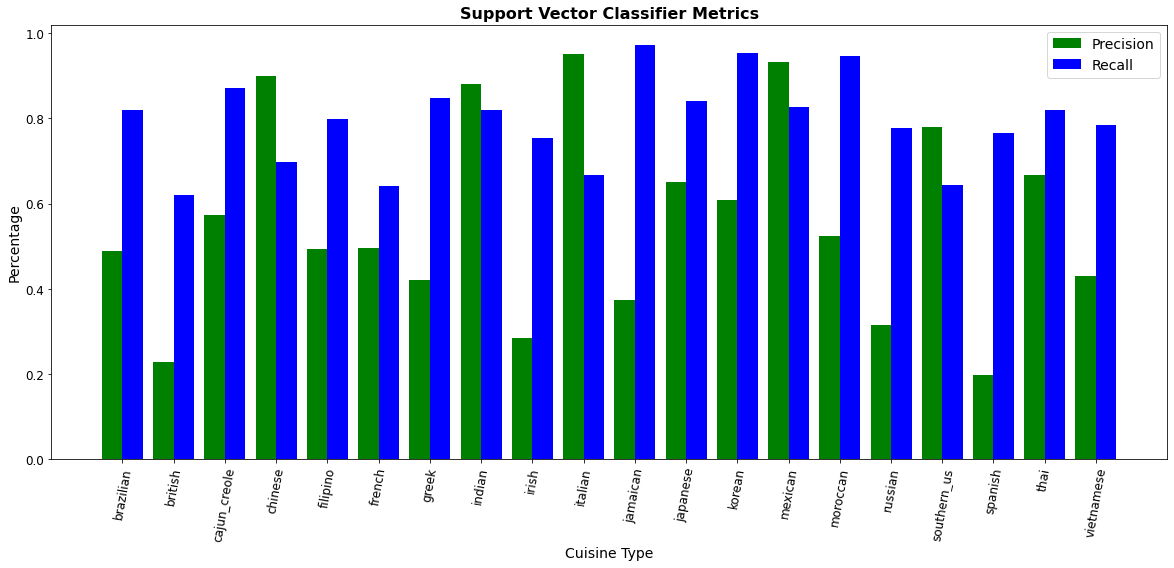

In [ ]:
# Set the width of the bar
barWidth = 0.4
fig = plt.subplots(figsize=(20, 8))

br1 = np.arange(20)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br1, cr_df.iloc[0][:20], width=barWidth, color='g', label='Precision')
plt.bar(br2, cr_df.iloc[1][:20], width=barWidth, color='b', label='Recall')

plt.title('Support Vector Classifier Metrics', fontsize=16, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(ticks=[r + barWidth/2 for r in range(20)],
           labels=cr_df.columns[:20], 
           fontsize=12, 
           rotation=80)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

We see that the accuracy on the test set is 74%. The random forest classfier model has indeed overfitted. For the next model, we will use linear support vector classifier.